Task 1: EDA and Initial Cleaning
Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       250000 non-null  object 
 1   Gender           250000 non-null  object 
 2   SeniorCitizen    250000 non-null  int64  
 3   Partner          250000 non-null  object 
 4   Dependents       250000 non-null  object 
 5   Tenure           250000 non-null  int64  
 6   PhoneService     250000 non-null  object 
 7   InternetService  242500 non-null  object 
 8   Contract         250000 non-null  object 
 9   PaymentMethod    242500 non-null  object 
 10  MonthlyCharges   242500 non-null  float64
 11  TotalCharges     237407 non-null  float64
 12  Timestamp        250000 non-null  object 
 13  Churn            250000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 26.7+ MB

Initial DataFra

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.74      0.96      0.84     36967
           1       0.27      0.04      0.07     13033

    accuracy                           0.72     50000
   macro avg       0.51      0.50      0.45     50000
weighted avg       0.62      0.72      0.64     50000


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     36967
           1       0.20      0.00      0.00     13033

    accuracy                           0.74     50000
   macro avg       0.47      0.50      0.43     50000
weighted avg       0.60      0.74      0.63     50000



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best hyperparameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best f1_weighted score: 0.6357187043382266

Task 5: Handling Class Imbalance


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'classifier__max_depth'

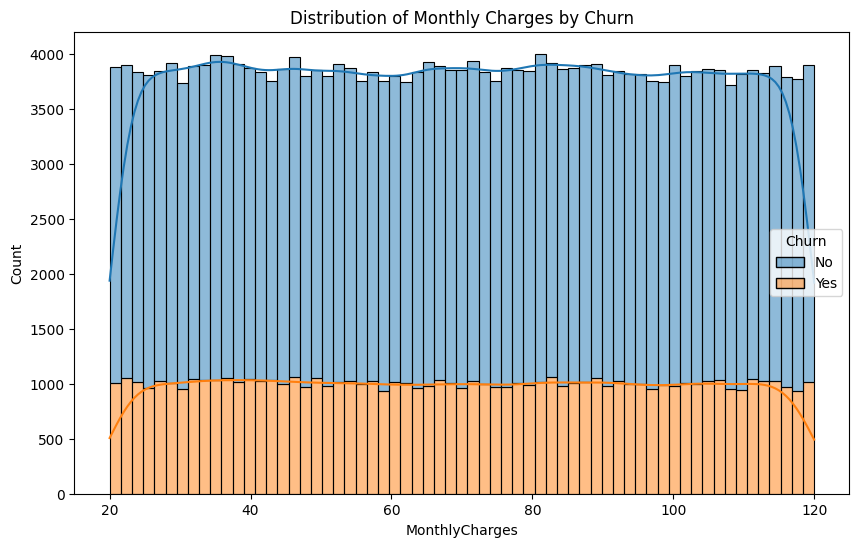

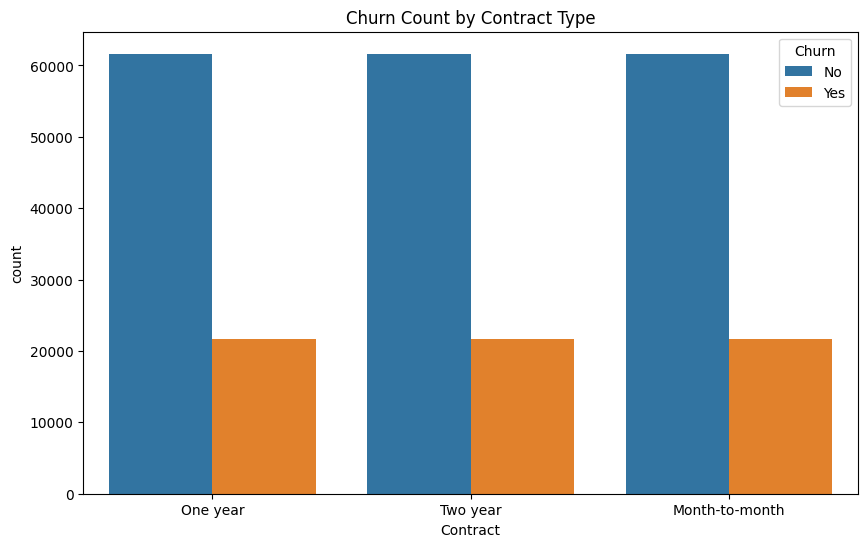

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Task 1: EDA and Initial Cleaning
print("Task 1: EDA and Initial Cleaning")
print("Initial DataFrame Info:")
df.info()
print("\nInitial DataFrame Head:")
print(df.head())

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify and analyze missing values
print("\nMissing Values After Coercion:")
print(df.isnull().sum())

# Data Visualization
# Numerical feature distribution (MonthlyCharges)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.savefig('monthly_charges_distribution.png')

# Categorical feature relationship (Contract)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Count by Contract Type')
plt.savefig('churn_by_contract.png')

# Task 2: Feature Engineering
print("\nTask 2: Feature Engineering")
df['MonthlyOverTotalRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1)
df['NoInternetService'] = (df['InternetService'] == 'No').astype(int)
print("New Features Created: 'MonthlyOverTotalRatio', 'NoInternetService'")
print(df[['MonthlyOverTotalRatio', 'NoInternetService']].head())

# Task 3: Building the End-to-End Pipeline
print("\nTask 3: Building the End-to-End Pipeline")
df_processed = df.drop(['CustomerID', 'Timestamp'], axis=1)
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(random_state=42))])
pipeline.fit(X_train, y_train)
print("\nPipeline with Logistic Regression trained successfully.")

# Task 4: Model Selection and Hyperparameter Tuning
print("\nTask 4: Model Selection and Hyperparameter Tuning")

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))

# Hyperparameter tuning for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20, None]
}
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"\nBest hyperparameters for Random Forest: {grid_search.best_params_}")
print(f"Best f1_weighted score: {grid_search.best_score_}")

# Task 5: Handling Class Imbalance
print("\nTask 5: Handling Class Imbalance")
# Using class_weight='balanced' with Random Forest
balanced_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', **grid_search.best_params_))])
balanced_rf_pipeline.fit(X_train, y_train)
y_pred_balanced = balanced_rf_pipeline.predict(X_test)
print("\nClassification Report with class_weight='balanced':")
print(classification_report(y_test, y_pred_balanced))

# Compare with the model without class_weight
no_balanced_rf_pipeline = grid_search.best_estimator_
y_pred_no_balanced = no_balanced_rf_pipeline.predict(X_test)
print("\nClassification Report without class_weight (tuned hyperparameters):")
print(classification_report(y_test, y_pred_no_balanced))

# Task 6: Final Evaluation and Interpretation
print("\nTask 6: Final Evaluation and Interpretation")
print("\nFinal Model Evaluation (with class_weight='balanced'):")
print("Precision:", precision_score(y_test, y_pred_balanced))
print("Recall:", recall_score(y_test, y_pred_balanced))
print("F1-Score:", f1_score(y_test, y_pred_balanced))
print("ROC AUC Score:", roc_auc_score(y_test, balanced_rf_pipeline.predict_proba(X_test)[:, 1]))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
print(conf_matrix)

# Feature Importance
ohe_feature_names = balanced_rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(ohe_feature_names)
importances = balanced_rf_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Most Important Features')
plt.savefig('feature_importance.png')

## Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

### Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       250000 non-null  object 
 1   Gender           250000 non-null  object 
 2   SeniorCitizen    250000 non-null  int64  
 3   Partner          250000 non-null  object 
 4   Dependents       250000 non-null  object 
 5   Tenure           250000 non-null  int64  
 6   PhoneService     250000 non-null  object 
 7   InternetService  242500 non-null  object 
 8   Contract         250000 non-null  object 
 9   PaymentMethod    242500 non-null  object 
 10  MonthlyCharges   242500 non-null  float64
 11  TotalCharges     237407 non-null  float64
 12  Timestamp        250000 non-null  object 
 13  Churn            250000 non-null  object 
dtypes: float64(2), int64(2), object(10)
mem

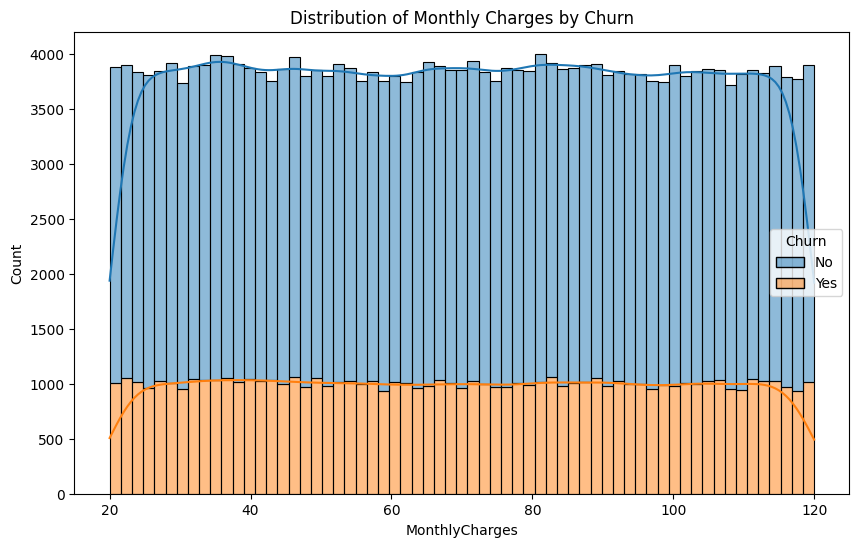

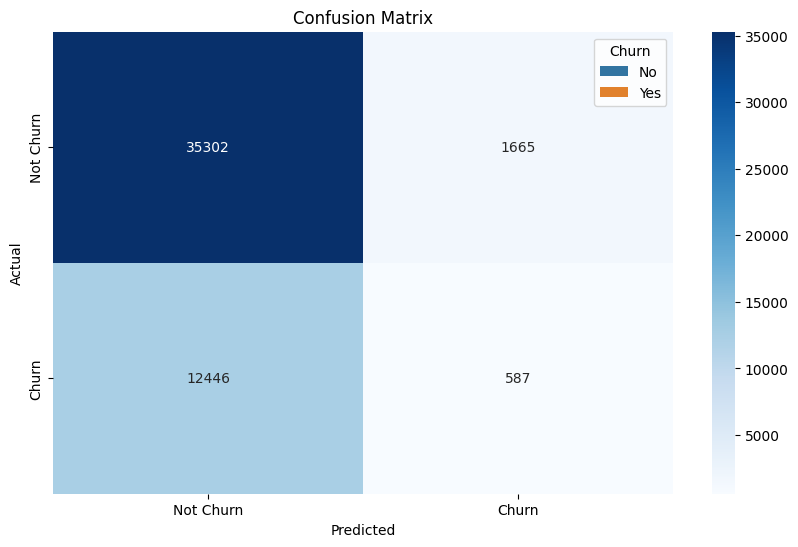

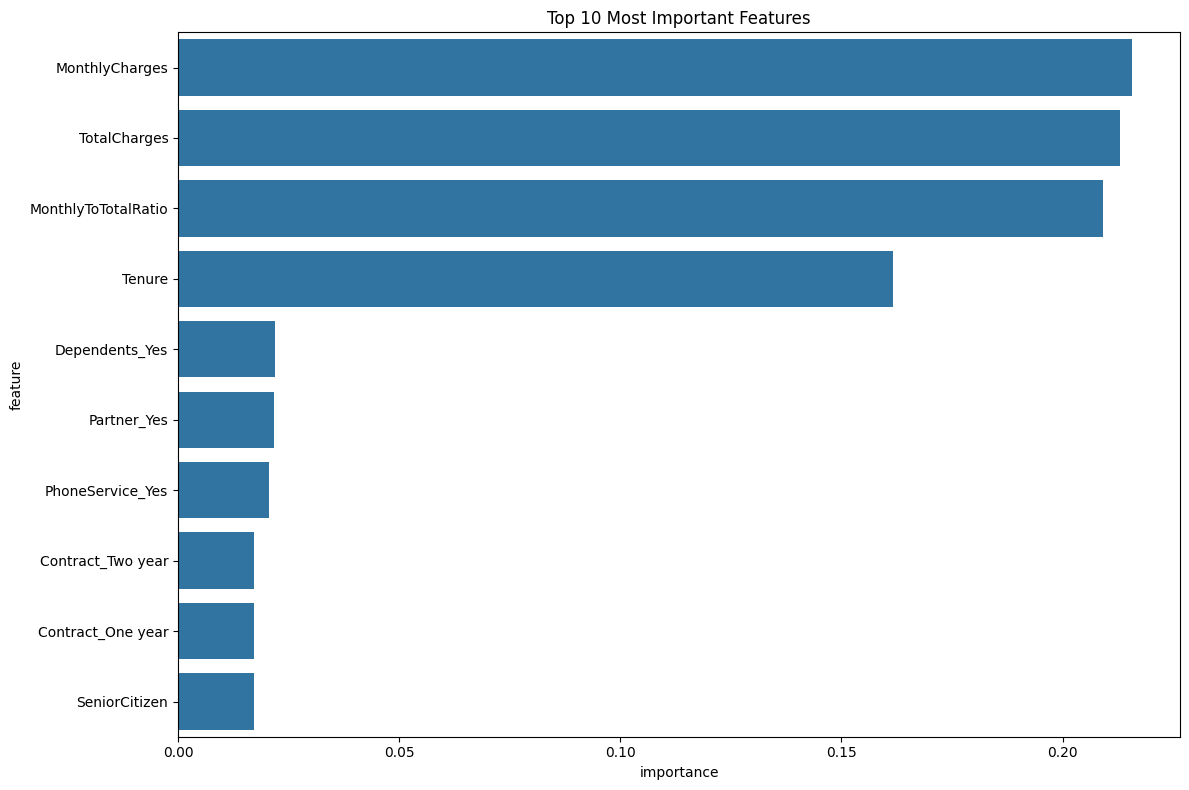

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# --- Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning ---
print("## Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning")

# Load and Inspect
print("\n### Initial DataFrame Info:")
df.info()
print("\n### Initial DataFrame Head:")
print(df.head())

# Initial Cleaning
print("\n### Cleaning `TotalCharges` and Checking Missing Values")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\nMissing Values After Coercion:")
print(df.isnull().sum())

# Data Visualization
print("\n### Generating Visualizations...")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', kde=True)
plt.title('Distribution of Monthly Charges by Churn')
plt.savefig('monthly_charges_distribution.png')
print("Saved 'monthly_charges_distribution.png'")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Count by Contract Type')
plt.savefig('churn_by_contract.png')
print("Saved 'churn_by_contract.png'")
print("-" * 50)

# --- Task 2: Feature Engineering ---
print("\n## Task 2: Feature Engineering")
df['MonthlyToTotalRatio'] = df['MonthlyCharges'] / (df['TotalCharges'] + 1) # Add 1 to avoid division by zero
df['HasNoInternetService'] = (df['InternetService'] == 'No').astype(int)
print("\nNew Features Created: 'MonthlyToTotalRatio', 'HasNoInternetService'")
print(df[['MonthlyToTotalRatio', 'HasNoInternetService']].head())
print("-" * 50)

# --- Task 3: Building the End-to-End Pipeline ---
print("\n## Task 3: Building the End-to-End Pipeline")
# Drop irrelevant columns and split data
X = df.drop(columns=['CustomerID', 'Timestamp', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numerical and categorical columns
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

# Define preprocessing steps
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the full pipeline with a classifier
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])
lr_pipeline.fit(X_train, y_train)
print("\nPipeline with Logistic Regression trained successfully.")
print("-" * 50)

# --- Task 4: Model Selection and Hyperparameter Tuning ---
print("\n## Task 4: Model Selection and Hyperparameter Tuning")

# Justification for model choices:
# 1. Logistic Regression: A great, simple baseline model.
# 2. Random Forest: An ensemble of decision trees, robust to overfitting and handles complex interactions.
# 3. Gradient Boosting: Another powerful ensemble method that builds trees sequentially, often yielding high performance.

# Define the hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_leaf': [1, 2]
}

# Create the pipeline for GridSearchCV
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])

# Perform Grid Search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nBest hyperparameters for Random Forest: {grid_search.best_params_}")
print(f"Best cross-validation f1_weighted score: {grid_search.best_score_:.4f}")
print("-" * 50)

# --- Task 5: Handling Class Imbalance ---
print("\n## Task 5: Handling Class Imbalance")

# **FIX:** Create a new dictionary for the best parameters without the 'classifier__' prefix
best_params = grid_search.best_params_
rf_best_params = {key.replace('classifier__', ''): value for key, value in best_params.items()}

# Create and train the pipeline with class_weight='balanced'
balanced_rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('classifier', RandomForestClassifier(random_state=42,
                                                                             class_weight='balanced',
                                                                             **rf_best_params))])
balanced_rf_pipeline.fit(X_train, y_train)
y_pred_balanced = balanced_rf_pipeline.predict(X_test)

print("\n### Classification Report (with class_weight='balanced'):")
print(classification_report(y_test, y_pred_balanced))

# For comparison, let's see the report for the model without imbalance handling
print("\n### Classification Report (without class_weight='balanced'):")
y_pred_imbalanced = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_imbalanced))
print("-" * 50)

# --- Task 6: Final Evaluation and Interpretation ---
print("\n## Task 6: Final Evaluation and Interpretation")
print("\n### Final Model Evaluation (Tuned & Balanced Random Forest on Test Set):")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_balanced):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, balanced_rf_pipeline.predict_proba(X_test)[:, 1]):.4f}")

# Confusion Matrix
print("\n### Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_balanced)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("Saved 'confusion_matrix.png'")

# Feature Importance
print("\n### Top 10 Feature Importances:")
# Get feature names after one-hot encoding
ohe_feature_names = balanced_rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

# Get importances
importances = balanced_rf_pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10)

print(feature_importance_df)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.savefig('feature_importance.png')
print("Saved 'feature_importance.png'")